In [1]:
#Import libraries
import mne 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [164]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataA = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataA[cond][ID] = raw.get_data()
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataA.pkl', 'wb') as f:
        pickle.dump(DataA, f)
f.close()

In [134]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataB = raw.copy()

In [151]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [2]:
import pandas as pd
import math

In [134]:
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [16]:
#Apply 50hz notch filter
from scipy.signal import butter, filtfilt
import numpy as np

for key in DataA.keys():
    for per in DataA[key].keys():
        data = DataA[key][per]
        
       # Define the filter parameters
        nyquist_freq = 0.5 * 500 # where sample_rate is your sampling frequency
        cutoff_freq = 30  # define your cutoff frequency
        order = 5  # choose the filter order

        # Generate the filter coefficients
        normalized_cutoff = cutoff_freq / nyquist_freq
        b, a = butter(order, normalized_cutoff, btype='lowpass')

        # Apply the notch filter to the data and replace the previous data
        DataA[key][per] = filtfilt(b, a, data)
#Save the new file
with open(os.path.join('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\LowPassedData',"DataA_LowPassed.pkl"), 'wb') as f:
    pickle.dump(DataA, f) 

f.close()


In [4]:
#Convert mne objects to numpy arrays
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_mne_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

#Convert mne objects to numpy arrays by looping through each object and convert to numpy array
DataB = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for key in DataA.keys():
    for per in DataA[key].keys():
        DataB[key][per] = DataA[key][per].get_data()

#Save the new file
with open('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl', 'wb') as f:
    pickle.dump(DataB, f)
f.close()


In [128]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej_2.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

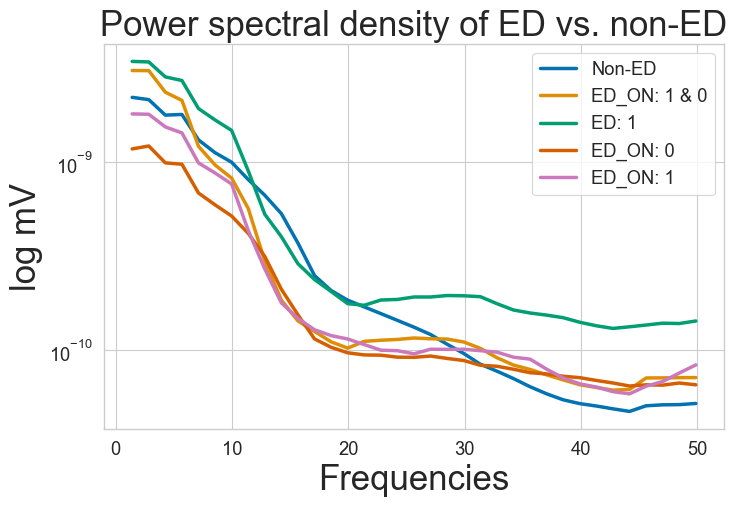

In [13]:
#### Compare ego dissolution vs. non-ego dissolution ####
import math

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    psdss['ED_ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1 and ON_sum == 1:
                    psdss['ED_ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ED_ON: 1 & 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else: 
            psdss['Non-ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(psdss['Non-ED'],axis=0).T),label='Non-ED')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1 & 0'],axis=0).T),label='ED_ON: 1 & 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED: 1'],axis=0).T),label='ED: 1')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 0'],axis=0).T),label='ED_ON: 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1'],axis=0).T),label='ED_ON: 1')
plt.yscale('log')
plt.xlabel('Frequencies', size=25)
plt.ylabel('log mV', size=25)
plt.title('Power spectral density of ED vs. non-ED', loc='center', size=25)
plt.legend()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison.png',dpi=300)


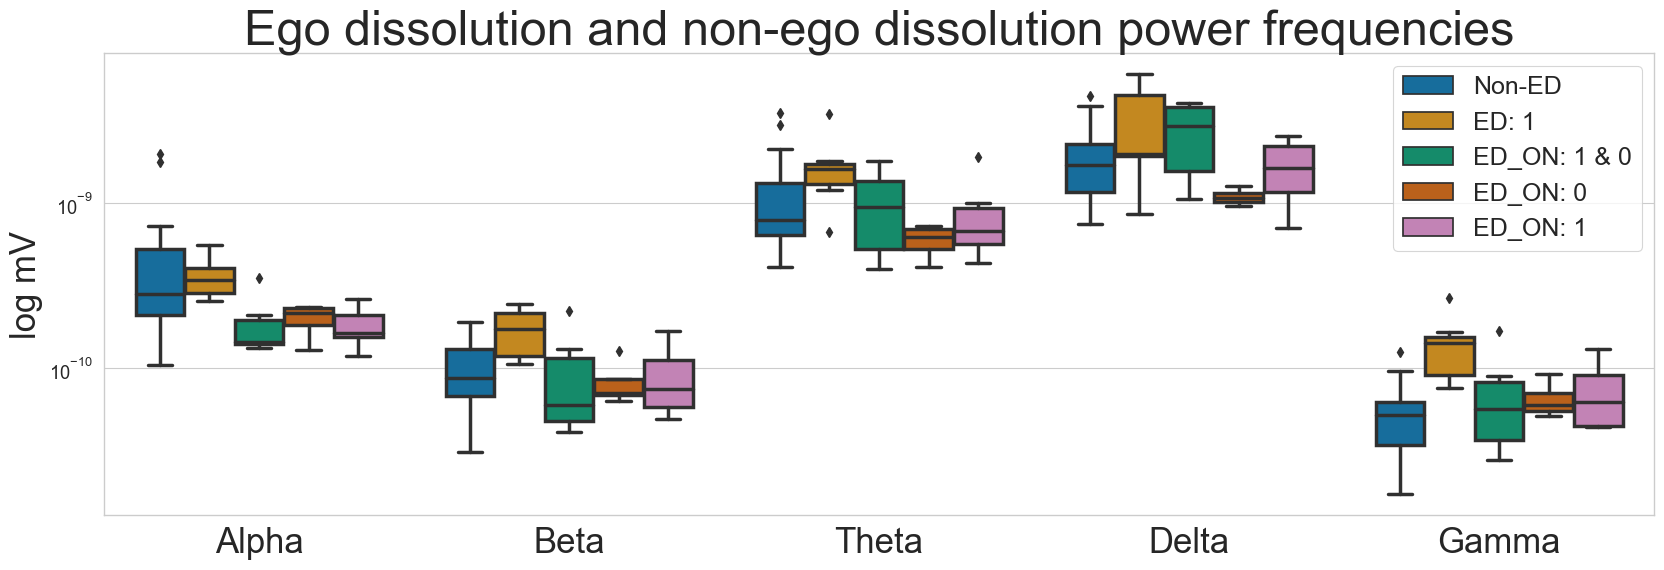

In [14]:
####Create boxplot of ED and non-ED####

#Convert all the frequencies to alpha, beta, theta, delta and gamma
#Alpha: 8-12 Hz
#Beta: 13-30 Hz
#Theta: 4-7 Hz
#Delta: 1-3 Hz
#Gamma: 31-50 Hz


#Create a dictionary with the frequencies
freqs = {'Alpha':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Beta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Theta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Delta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Gamma':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}}
for cond in psdss.keys():
    for psd in psdss[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))
# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind")
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=25)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=25)
plt.legend(loc=(1.01, 0.5))
plt.title('Ego dissolution and non-ego dissolution power frequencies', size=35)
plt.legend(fontsize=18)
# Resize the figure to a specific size
plt.gcf().set_size_inches(20, 6) 
#Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison_boxplot.png',dpi=300)
# Show the plot
plt.show()


In [ ]:
#Perform One-way ANOVA on the data
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

for freq in freqs.keys():
    fvalue, pvalue = f_oneway(freqs[freq]['Non-ED'], freqs[freq]['ED: 1'], freqs[freq]['ED_ON: 1 & 0'], freqs[freq]['ED_ON: 0'],freqs[freq]['ED_ON: 1'])
    alpha, beta, delta, theta, gamma = freqs[freq]['Non-ED'], freqs[freq]['ED: 1'], freqs[freq]['ED_ON: 1 & 0'], freqs[freq]['ED_ON: 0'],freqs[freq]['ED_ON: 1']
    total_variance = sum([(x - sum(alpha + beta + delta + theta + gamma) / len(alpha + beta + delta + theta + gamma))**2 for x in alpha + beta + delta + theta + gamma])
    explained_variance = 1 - (sum([len(group)*(np.mean(group) - np.mean(alpha + beta + delta + theta + gamma))**2 for group in [alpha, beta, delta, theta, gamma]]) / (len(alpha + beta + delta + theta + gamma) - 1)) / (total_variance / (len(alpha + beta + delta + theta + gamma) - 1))

    print('Frequency: ', freq, 'F-value: ', fvalue, 'P-value: ', pvalue, 'explained variance: ', explained_variance)

In [ ]:
#Get sum of squares and mean squared as above
from statistics import mean

for freq in freqs.keys():
    mean_squared = math.log(mean([mean(freqs[freq]['Non-ED']),mean(freqs[freq]['ED: 1']),mean(freqs[freq]['ED_ON: 1 & 0']), mean(freqs[freq]['ED_ON: 0']),mean(freqs[freq]['ED_ON: 1'])]))
    sum_of_squares = math.log(sum([(x - mean_squared)**2 for x in freqs[freq]['Non-ED'] + freqs[freq]['ED: 1'] + freqs[freq]['ED_ON: 1 & 0'] + freqs[freq]['ED_ON: 0'] + freqs[freq]['ED_ON: 1']]))
    print('Frequency: ', freq, 'Sum of squares: ', sum_of_squares, 'Mean squared: ', mean_squared)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

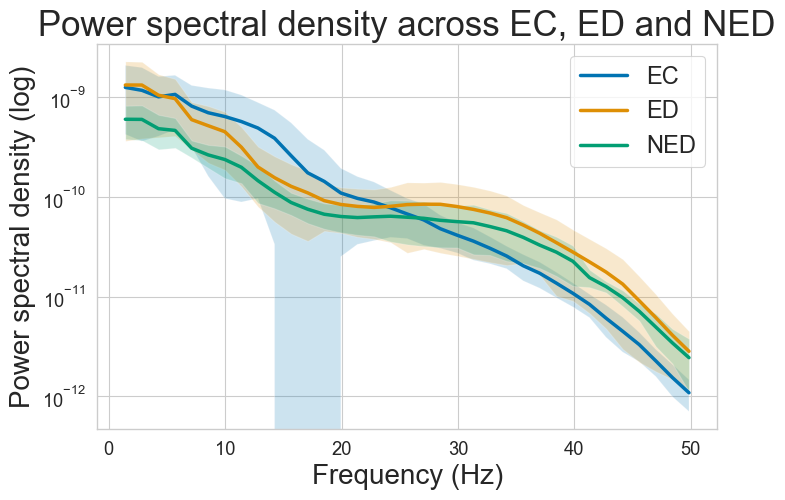

In [134]:
#Same as above, but with only ED: 0 and ED: 1 instead
#### Compare ego dissolution vs. non-ego dissolution ####
import mne
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'EC':[],'ED':[], 'NED':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    psdss['NED'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1:
                    psdss['ED'].append(np.mean(np.mean(psds,axis=0),axis=0))
        elif cond == 'EC':
            psdss['EC'].append(np.mean(np.mean(psds,axis=0),axis=0))

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(psdss['EC'],axis=0).T),label='EC')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED'],axis=0).T),label='ED')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['NED'],axis=0).T),label='NED')

plt.fill_between(sfreq, np.mean(psdss['EC'],axis=0).T-np.std(psdss['EC'],axis=0).T, np.mean(psdss['EC'],axis=0).T+np.std(psdss['EC'],axis=0).T, alpha=0.2)
plt.fill_between(sfreq, np.mean(psdss['ED'],axis=0).T-np.std(psdss['ED'],axis=0).T, np.mean(psdss['ED'],axis=0).T+np.std(psdss['ED'],axis=0).T, alpha=0.2)
plt.fill_between(sfreq, np.mean(psdss['NED'],axis=0).T-np.std(psdss['NED'],axis=0).T, np.mean(psdss['NED'],axis=0).T+np.std(psdss['NED'],axis=0).T, alpha=0.2)
plt.yscale('log')
plt.title('Power spectral density across EC, ED and NED', size=25)
plt.xlabel('Frequency (Hz)', size=20)
plt.ylabel('Power spectral density (log)',size=20)
plt.legend(fontsize=17)
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches
plt.show()
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison_bin.png',dpi=300)

Creating RawArray with float64 data, n_channels=63, n_times=351
    Range : 0 ... 350 =      0.000 ...     0.700 secs
Ready.


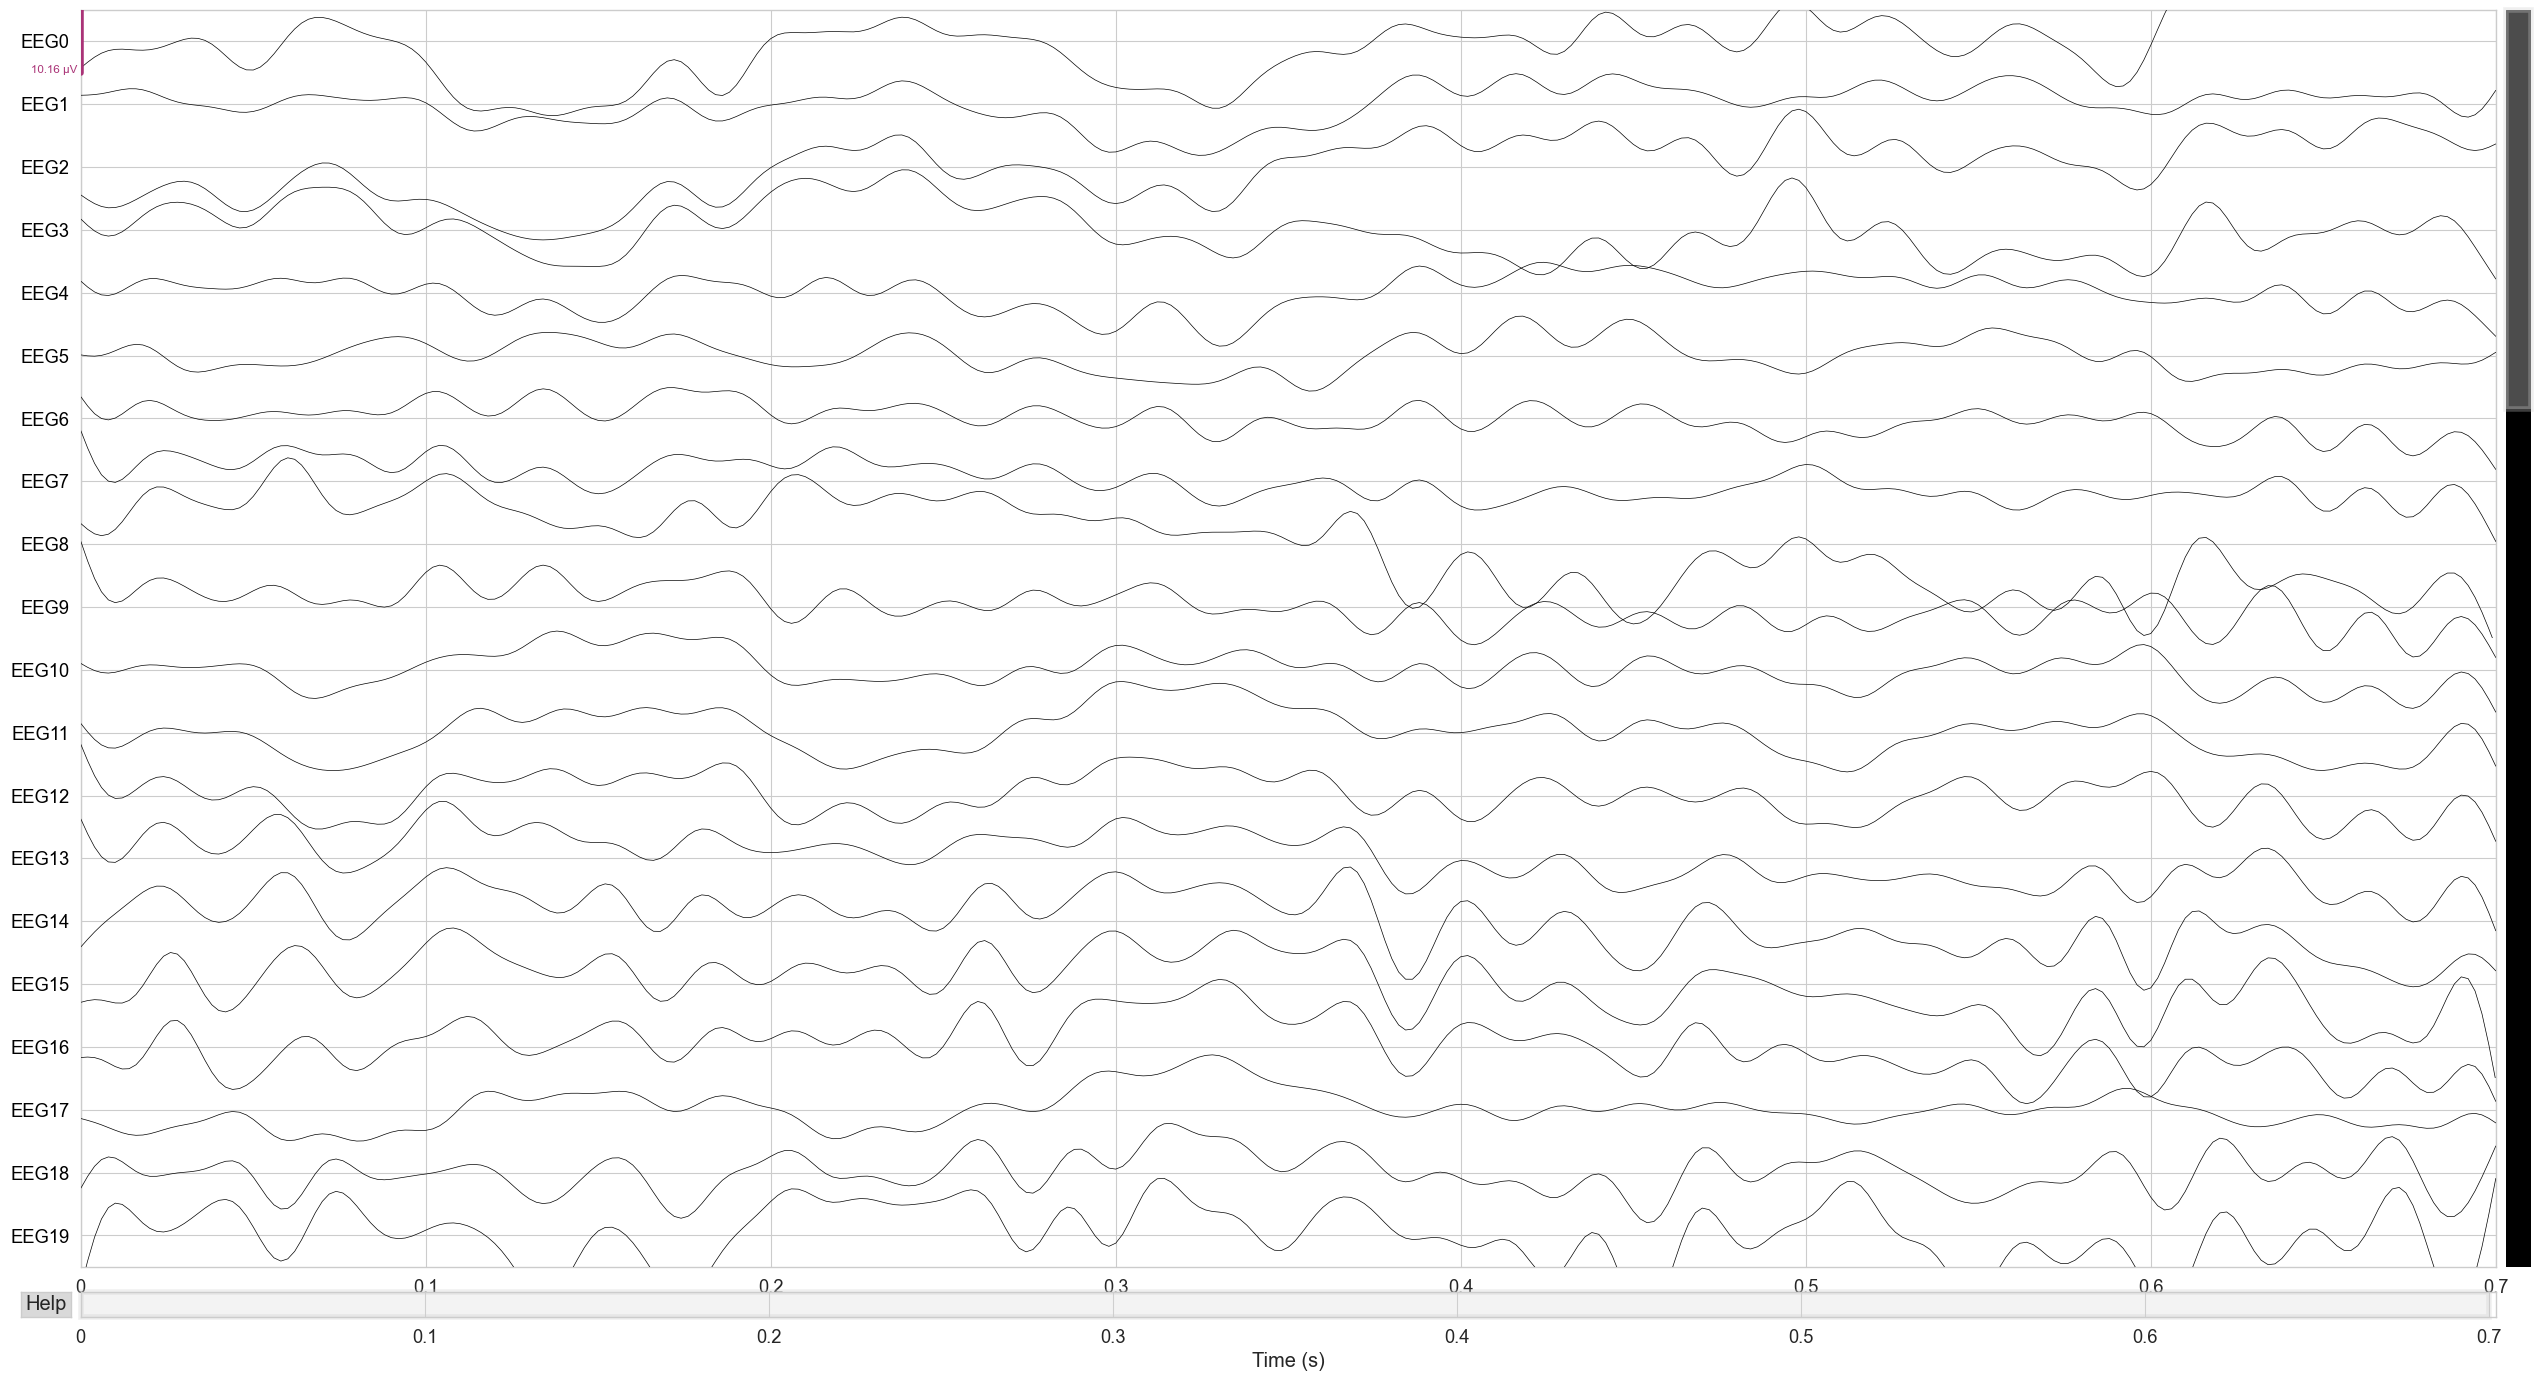

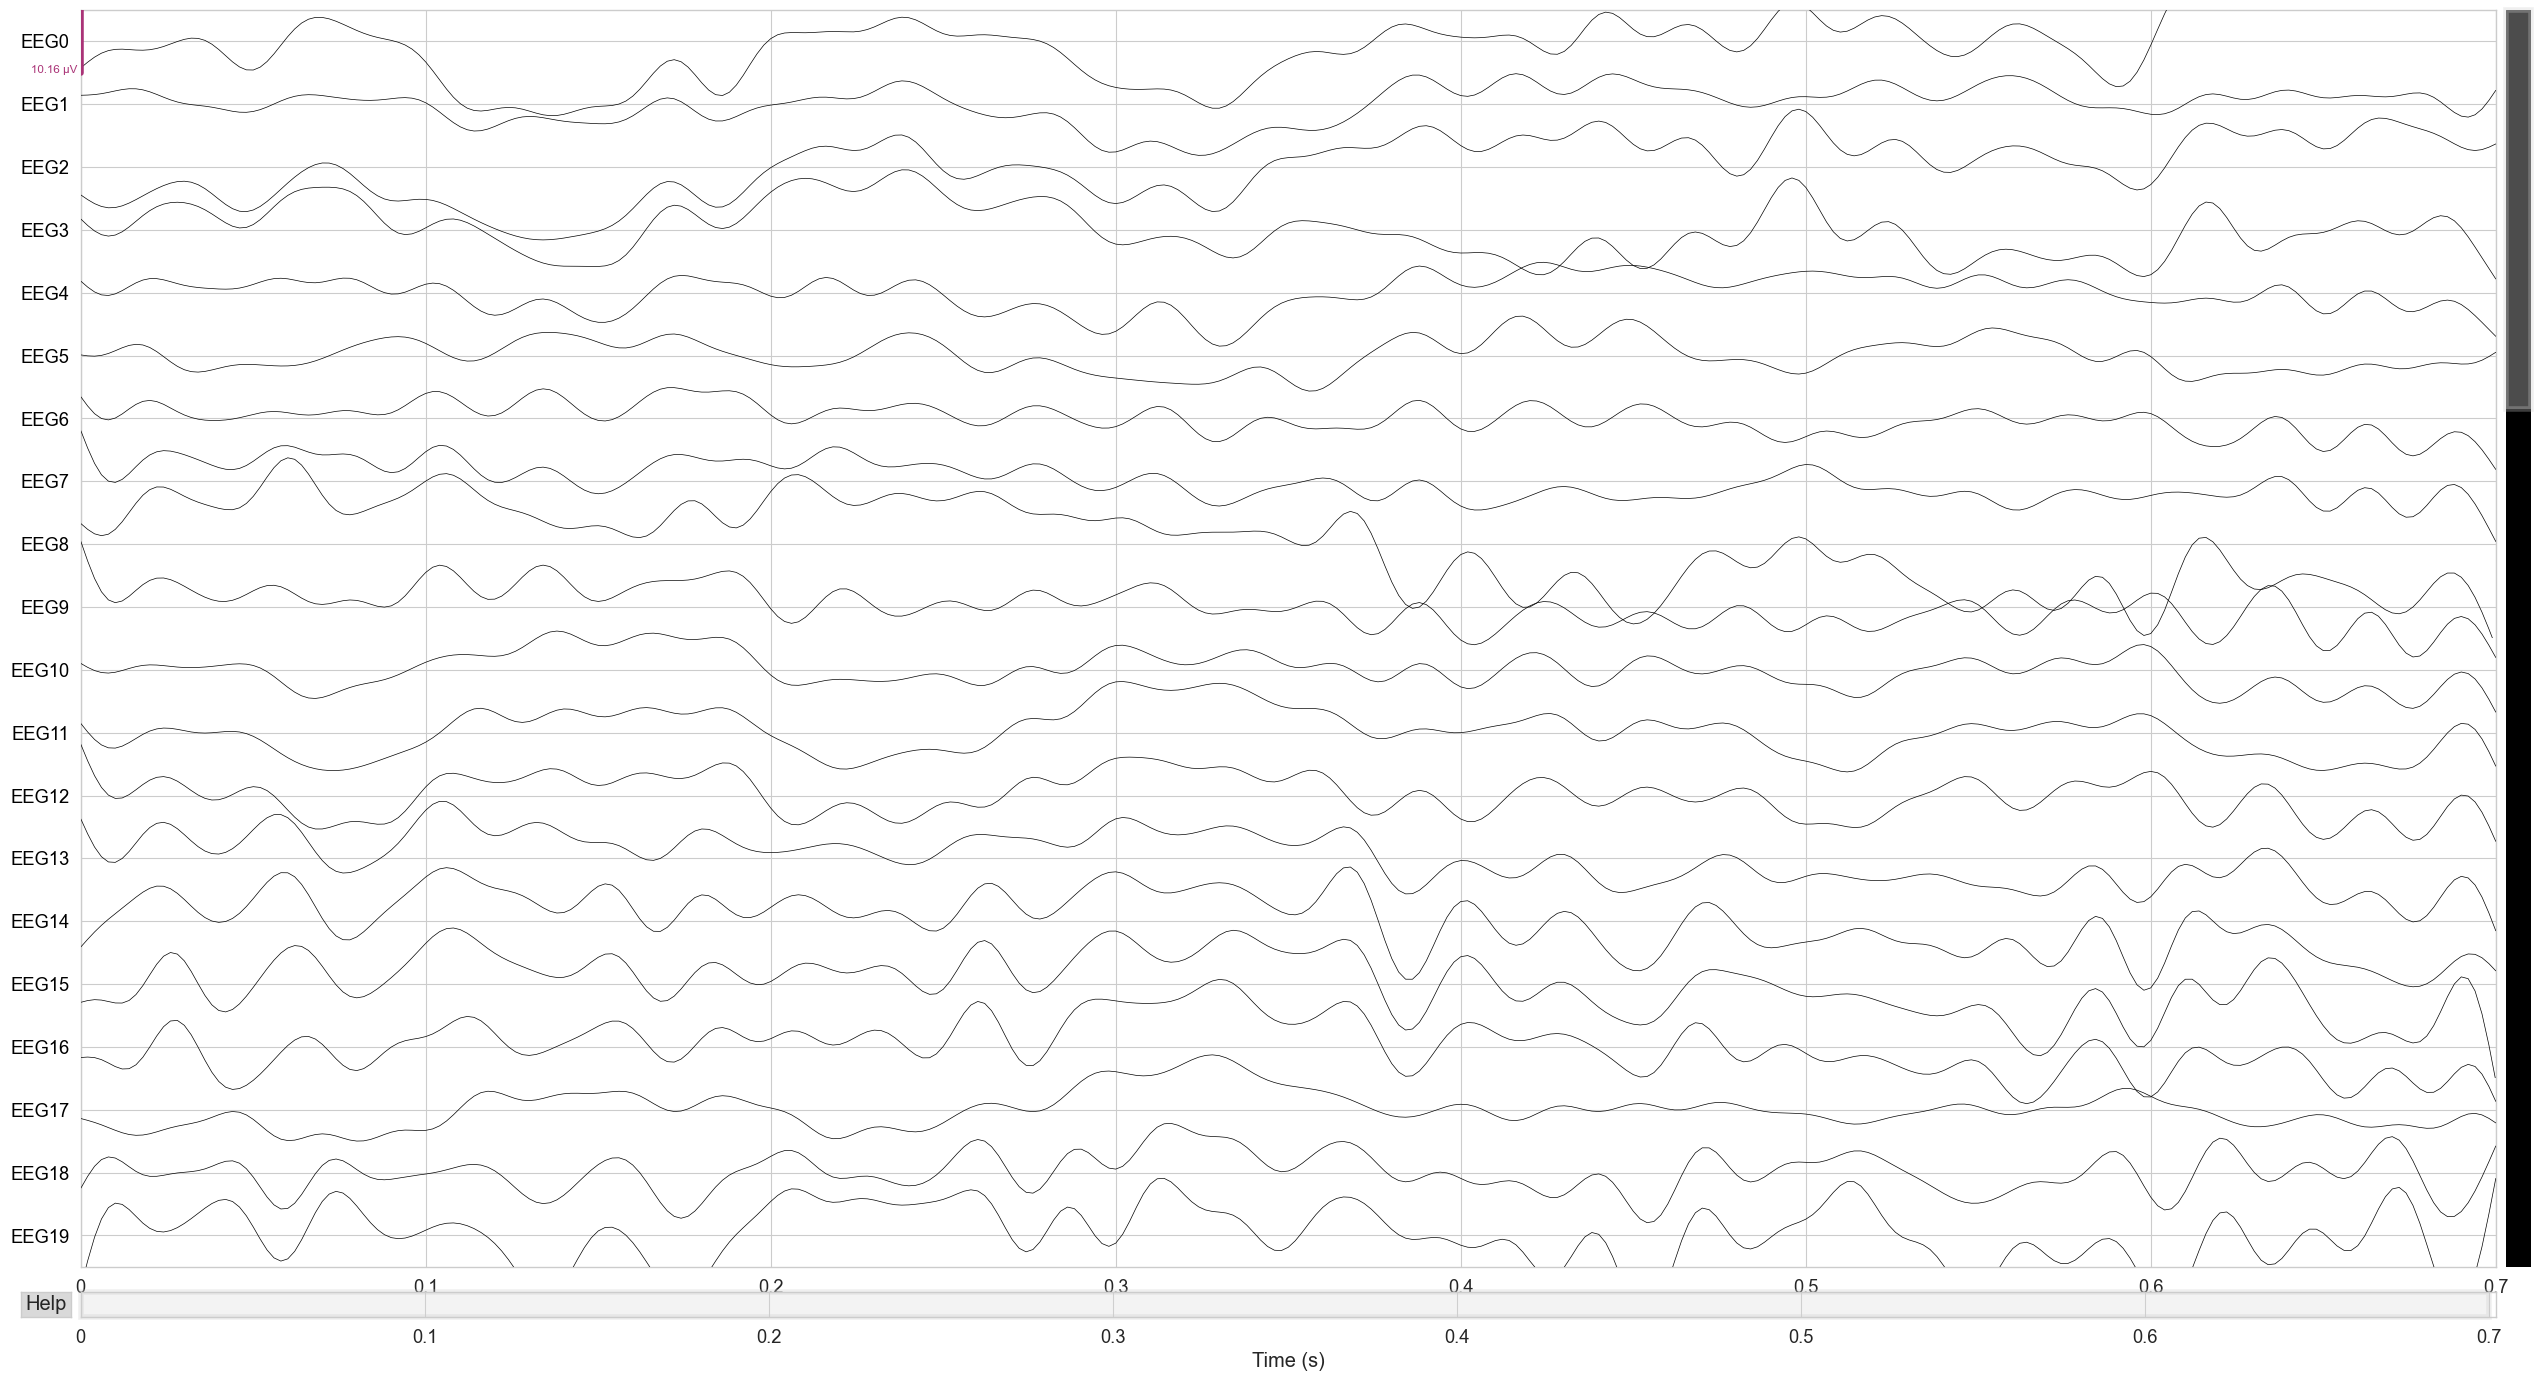

In [107]:
#Plot random epoch for example to the thesis

DataAd = DataA.copy()

data = DataAd['SED_2']['SD5008'][-1]

# create an MNE info object
sfreq = 500  # sampling rate in Hz
ch_names = ['EEG{}'.format(i) for i in range(63)]  # channel names
ch_types = ['eeg'] * 63  # all channels are EEG
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# create an MNE RawArray object from the EEG data and info
raw = mne.io.RawArray(data, info)

# plot the EEG data
raw.plot(scalings='auto', title='Auto-scaled Data from arrays', show=True, block=True, color='black',n_channels=20)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

DataAd = DataA.copy()

eeg_data = DataAd['SED_2']['SD5008'][-1]

# segment the EEG data into epochs of 500 ms with 50% overlap
epoch_size = 10  # epoch size in ms
overlap = 0  # overlap fraction
n_samples = eeg_data.shape[1]
step_size = int(epoch_size)
n_epochs = int((n_samples - epoch_size) / step_size) + 1
epochs = np.zeros((n_epochs, eeg_data.shape[0], epoch_size))
for i in range(n_epochs):
    start = i * step_size
    end = start + epoch_size
    epochs[i, :, :] = eeg_data[:, start:end]

# plot the first epoch of the epoched EEG data for channel 0
epoch = 0
channel = 0
plt.plot(epochs[epoch, channel, :])

# set the x and y axis labels
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')

# show the plot
plt.show()


In [141]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej_2.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

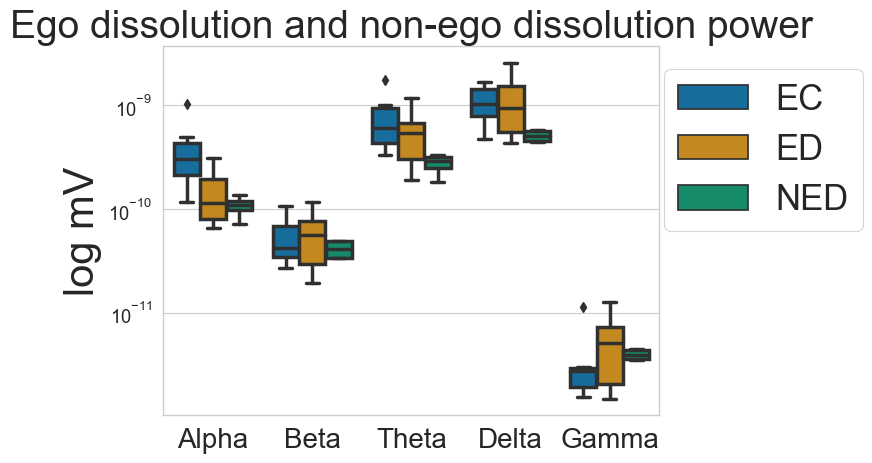

In [142]:
#Same as above, create boxplots for all frequencies with binary ego dissolution classification
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics
#Convert all the frequencies to alpha, beta, theta, delta and gamma
#Alpha: 8-12 Hz
#Beta: 13-30 Hz
#Theta: 4-7 Hz
#Delta: 1-3 Hz
#Gamma: 31-50 Hz

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'EC':[],'ED':[], 'NED':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    psdss['NED'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1:
                    psdss['ED'].append(np.mean(np.mean(psds,axis=0),axis=0))
        elif cond == 'EC':
            psdss['EC'].append(np.mean(np.mean(psds,axis=0),axis=0))


#Create a dictionary with the frequencies
freqs = {'Alpha':{'EC':[],'ED':[],'NED':[]},'Beta':{'EC':[],'ED':[],'NED':[]},'Theta':{'EC':[],'ED':[],'NED':[]},'Delta':{'EC':[],'ED':[],'NED':[]},'Gamma':{'EC':[],'ED':[],'NED':[]}}
for cond in psdss.keys():
    for psd in psdss[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))
# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind")
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=30)
plt.legend(loc=(1.01, 0.5),fontsize=25)
plt.title('Ego dissolution and non-ego dissolution power', size=28)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison_boxplot.png',dpi=300)
# Show the plot
plt.show()

In [ ]:
### CREATE TOPOGRAPHICAL DIFFERENCE PLOT ###   

#Same as above, create boxplots for all frequencies with binary ego dissolution classification
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics
#Convert all the frequencies to alpha, beta, theta, delta and gamma
#Alpha: 8-12 Hz
#Beta: 13-30 Hz
#Theta: 4-7 Hz
#Delta: 1-3 Hz
#Gamma: 31-50 Hz

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'EC':[],'ED':[], 'NED':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    psdss['NED'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1:
                    psdss['ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

freqs = {'ED: 0':{'Alpha':[],'Beta':[],'Theta':[],'Delta':[],'Gamma':[]}}
for cond in psdss.keys():
    for psd in psdss[cond].keys():
        freqs['Alpha'][cond].append(psd[8:12],axis=0)
        freqs['Beta'][cond].append(psd[13:30],axis=0)
        freqs['Theta'][cond].append(psd[4:7],axis=0)
        freqs['Delta'][cond].append(psd[1:3],axis=0)
        freqs['Gamma'][cond].append(psd[31:50],axis=0)

# Define the frequency bands
freq_bands = {'alpha': [8, 12], 'beta': [13, 30], 'delta': [1, 3], 'theta': [4, 7], 'gamma': [31, 50]}

# Compute the power spectral density (PSD) for each frequency band using MNE
sfreq = 500  # Sampling frequency
psds1, freqs1 = mne.time_frequency.psd_mult

taper_params = dict(width=0.5, verbose='WARNING')
psds1, freqs1 = mne.time_frequency.psd_multitaper(data1, sfreq=sfreq, fmin=1, fmax=45, n_jobs=1)
psds2, freqs2 = mne.time_frequency.psd_multitaper(data2, sfreq=sfreq, fmin=1, fmax=45, n_jobs=1)

# Compute the differential PSD for each frequency band
diff_psds = {}
for band, freq_range in freq_bands.items():
    freq_mask = (freqs1 >= freq_range[0]) & (freqs1 <= freq_range[1])
    diff_psds[band] = np.mean(psds1[:, freq_mask], axis=1) - np.mean(psds2[:, freq_mask], axis=1)

# Plot the differential PSDs on a topographical plot using MNE
ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
montage = mne.channels.make_standard_montage('standard_1020')
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=['eeg'] * len(ch_names))
info.set_montage(montage)

fig, axes = plt.subplots(nrows=1, ncols=len(diff_psds), figsize=(20, 4))

for i, (band, diff_psd) in enumerate(diff_psds.items()):
    mne.viz.plot_topomap(diff_psd, info, axes=axes[i], cmap='RdBu_r', vmin=-10, vmax=10, show=False)
    axes[i].set_title(band.capitalize() + ' power difference')

plt.show()



In [27]:
print(freqs['Alpha']['ED: 1'])

[3.3926294790031403e-10, 2.210648380106771e-10, 8.683555486307742e-11, 7.262214343985829e-11, 1.2764072355039876e-10, 1.5450442496493925e-10, 2.671583683704957e-10, 2.049127269769344e-10, 6.46176984194359e-11, 8.438128684464098e-11, 8.171346637834492e-11, 1.674328462904683e-10, 2.0698209292463064e-10, 6.568731490677826e-11, 8.733364834340491e-11, 1.840066156718805e-10, 1.2725425621556836e-10, 6.260039888160661e-11, 7.485504168693665e-11]


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# create a list of group labels
group_labels = ['Non-ED', 'ED: 1', 'ED_ON: 1 & 0', 'ED_ON: 0', 'ED_ON: 1']

fs_ps = list()
for freq in freqs.keys():
    
    fvalue, pvalue = f_oneway(freqs[freq]['Non-ED'], freqs[freq]['ED: 1'], freqs[freq]['ED_ON: 1 & 0'], freqs[freq]['ED_ON: 0'],freqs[freq]['ED_ON: 1'])
    print('Frequency: ', freq, 'F-value: ', fvalue, 'P-value: ', pvalue)

In [28]:
#Get degrees of freedom
df1 = len(freqs['Alpha']['Non-ED'])-1
df2 = len(freqs['Alpha']['ED: 1'])-1
df3 = len(freqs['Alpha']['ED_ON: 1 & 0'])-1
df4 = len(freqs['Alpha']['ED_ON: 0'])-1
df5 = len(freqs['Alpha']['ED_ON: 1'])-1

print(df1+df2+df3+df4+df5)

45


In [3]:
import pickle
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej_2.pkl.'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [15]:
#Basically same as above, just differentiated both conditions into frontal, parietal, occipital and temporal regions by channels

#Same as above, but with only ED: 0 and ED: 1 instead
#### Compare ego dissolution vs. non-ego dissolution ####
import mne
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'ED: 0':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}, 'ED: 1':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}}
ch_nams = ['Fp1', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']
brain_regs = {'frontal':['F3', 'F4', 'F7'], 'occipital':['O1', 'O2', 'Oz'], 'temporal':['T8','TP8','T7'], 'parietal':['P3','P4','P7']}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        for reg in brain_regs.keys():
            chs_idx = list()
            if pers == 'Pilot_2001':
                pers = '2001'
            for ch in brain_regs[reg]:
                chs_idx.append(ch_nams.index(ch))
            psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers][:,chs_idx,:],sfreq=500, fmin=1, fmax=50)
            if pers == '2001':
                pers = 'Pilot_2001'
            if cond in ket_conds:
                ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
                if ED_sum == ED_sum:
                    if type(ED_sum) == str:
                        ED_sum = int(round(float(ED_sum)))
                    else:
                        ED_sum = int(ED_sum)
                    if ED_sum == 0:
                        psdss['ED: 0'][reg].append(np.mean(np.mean(psds,axis=0),axis=0))
                    elif ED_sum == 1:
                        psdss['ED: 1'][reg].append(np.mean(np.mean(psds,axis=0),axis=0))

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

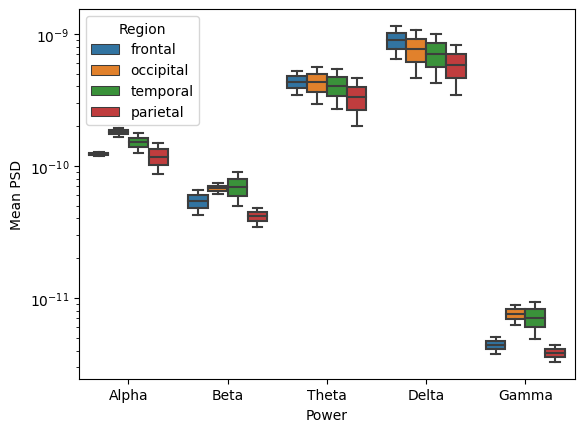

In [23]:
#Same as above, create boxplots for all frequencies with binary ego dissolution classification
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics
#Convert all the frequencies to alpha, beta, theta, delta and gamma
#Alpha: 8-12 Hz
#Beta: 13-30 Hz
#Theta: 4-7 Hz
#Delta: 1-3 Hz
#Gamma: 31-50 Hz


#Create a dictionary with the frequencies
freqs = {'Alpha':{'ED: 0':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}, 
        'ED: 1':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}},
        'Beta':{'ED: 0':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}, 
        'ED: 1':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}},
        'Theta':{'ED: 0':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]},
        'ED: 1':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}},
        'Delta':{'ED: 0':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}, 
        'ED: 1':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}},
        'Gamma':{'ED: 0':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}, 
        'ED: 1':{'frontal':[],'occipital':[], 'temporal':[],'parietal':[]}}}
for cond in psdss.keys():
    for reg in psdss[cond].keys():
        for psd in psdss[cond][reg]:
            freqs['Alpha'][cond][reg].append(np.mean(psd[8:12],axis=0))
            freqs['Beta'][cond][reg].append(np.mean(psd[13:30],axis=0))
            freqs['Theta'][cond][reg].append(np.mean(psd[4:7],axis=0))
            freqs['Delta'][cond][reg].append(np.mean(psd[1:3],axis=0))
            freqs['Gamma'][cond][reg].append(np.mean(psd[31:50],axis=0))
# Create a list of dictionaries for each observation
obs_dict = {'Power':[],'Condition':[],'Region':[],'Mean PSD':[]}
for freq in freqs.keys():
    for cond in freqs[freq].keys():
        for reg in freqs[freq][cond].keys():
            obs_dict['Power'].append(freq)
            obs_dict['Condition'].append(cond)
            obs_dict['Region'].append(reg)
            obs_dict['Mean PSD'].append(np.mean(freqs[freq][cond][reg],axis=0))
df = pd.DataFrame.from_dict(obs_dict)

df0 = df[df['Condition'] == 'ED: 0']
df1 = df[df['Condition'] == 'ED: 1']

sns.boxplot(x='Power', y='Mean PSD', hue='Region', data=df0)
plt.yscale('log')
plt.xlabel(None)
plt.title('NED regional power comparison')   
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\reg_psd_ed_comp_2.png', dpi=300)

In [80]:
import pickle
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej_2.pkl.'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

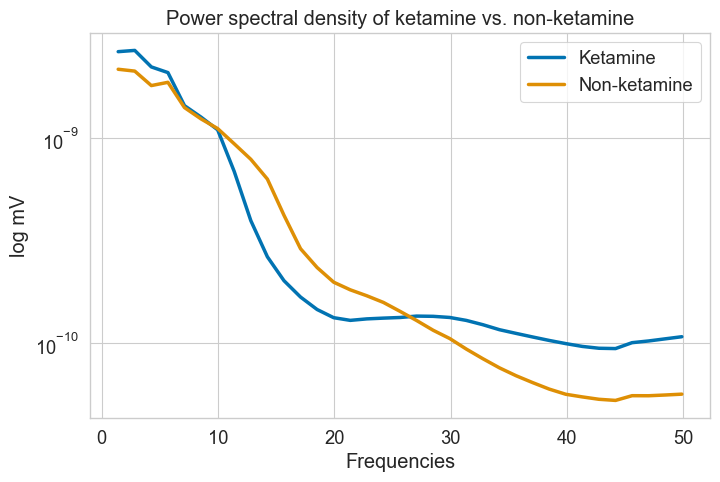

In [86]:
#Psd between ket and non-ket
DataAd = DataA.copy()
#Categorize data by ket or non-ket
Ketictary = {'Ket':[],'No-ket':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            Ketictary['Ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else:
            Ketictary['No-ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
#plot the psd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(Ketictary['Ket'],axis=0).T),label='Ketamine')
sns.lineplot(x=sfreq,y=list(np.mean(Ketictary['No-ket'],axis=0).T),label='Non-ketamine')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.title('Power spectral density of ketamine vs. non-ketamine', loc='center')
plt.legend()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison.png',dpi=300)

Alpha 0.012130773965211703
Beta 0.38772198132323865
Theta 0.9571471501831837
Delta 0.15336167198271083
Gamma 0.0010630474405553217


C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\3012697040.py:45: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  y = np.max([max(st.t.interval(alpha=0.95, df=len(group1)-1, loc=statistics.mean(group1), scale=st.sem(group1))), max(st.t.interval(alpha=0.95, df=len(group2)-1, loc=statistics.mean(group2), scale=st.sem(group2)))]) + 0.00000000040


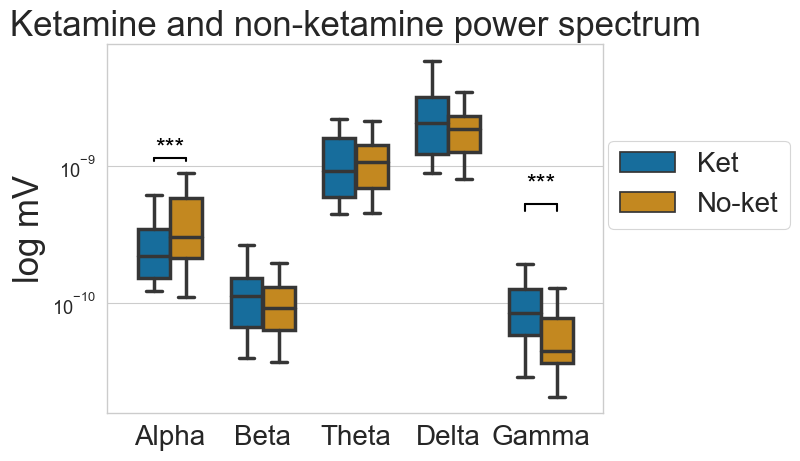

In [113]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics

#Now do the same for the boxplot
#Create a dictionary with the frequencies
freqs = {'Alpha':{'Ket':[], 'No-ket':[]},'Beta':{'Ket':[], 'No-ket':[]},'Theta':{'Ket':[], 'No-ket':[]},'Delta':{'Ket':[], 'No-ket':[]},'Gamma':{'Ket':[], 'No-ket':[]}}
for cond in Ketictary.keys():
    for psd in Ketictary[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))

# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind", width=0.7, showfliers=False)
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=25)
plt.legend(loc=(1.01, 0.5), fontsize=20)
plt.title('Ketamine and non-ketamine power spectrum', size=25)
# Resize the figure to a specific size

#Calculate significance levels 
#Create loop of checking all possible combinations and calculating the t-test
ys = list()
i = 0
for key in freqs.keys():
    group1, group2 = freqs[key]['Ket'], freqs[key]['No-ket']
    t, p = ttest_ind(group1, group2)
    # add significance lines if p-value is significant
    print(key, p)
    if p < 0.05:
        # calculate y position for the line
        y = np.max([max(st.t.interval(alpha=0.95, df=len(group1)-1, loc=statistics.mean(group1), scale=st.sem(group1))), max(st.t.interval(alpha=0.95, df=len(group2)-1, loc=statistics.mean(group2), scale=st.sem(group2)))]) + 0.00000000040
        # add line with asterisks indicating significance level
        plt.plot([i-0.175, i+0.175], [y, y], lw=1.5, c='k')
        plt.plot([i-0.175, i-0.175], [y, y - 0.00000000006], lw=1.5, c='k')
        plt.plot([i+0.175,i+0.175], [y, y - 0.00000000006], lw=1.5, c='k')
        plt.text(i, y + 0.0000000002, "***", ha='center', va='center', color='k', fontsize=18)
    i += 1

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison_boxplot.png',dpi=300)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

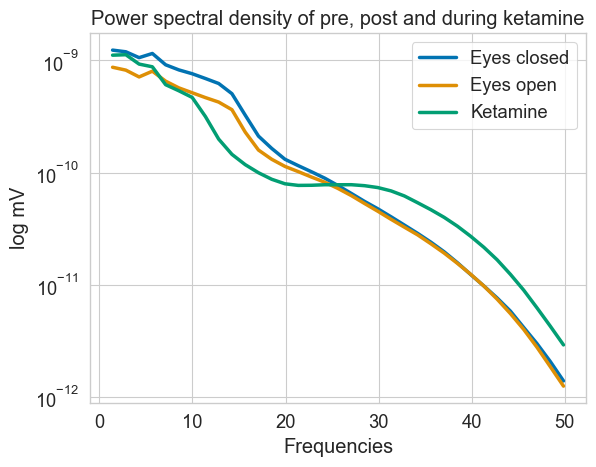

<Figure size 800x500 with 0 Axes>

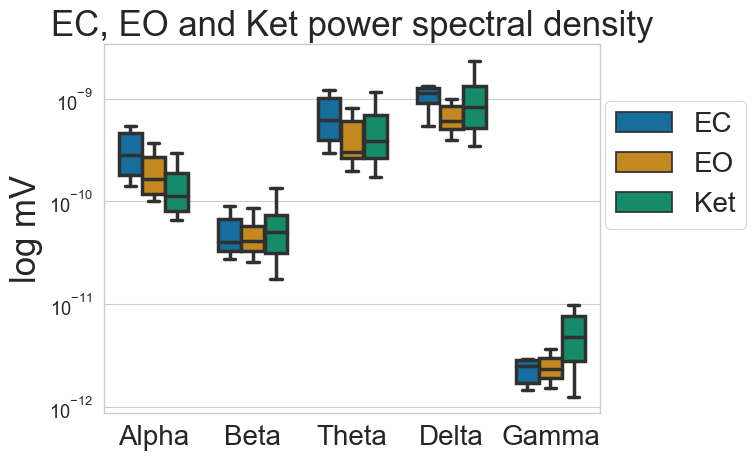

In [87]:
#Same as above, but with pre-ket, ket and post-ket

#Psd between pre-ket, ket and post-ket
DataAd = DataA.copy()
#Categorize data by ket or non-ket
Ketictary2 = {'EC':[],'EO':[],'Ket':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            Ketictary2['Ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
        elif cond == 'EO' or cond == 'EC':
            Ketictary2[cond].append(np.mean(np.mean(psds,axis=0),axis=0))

#plot the psd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(Ketictary2['EC'],axis=0).T),label='Eyes closed')
sns.lineplot(x=sfreq,y=list(np.mean(Ketictary2['EO'],axis=0).T),label='Eyes open')
sns.lineplot(x=sfreq,y=list(np.mean(Ketictary2['Ket'],axis=0).T),label='Ketamine')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.title('Power spectral density of pre, post and during ketamine', loc='center')
plt.legend()
plt.show()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison.png',dpi=300)

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import statistics

#Now do the same for the boxplot
#Create a dictionary with the frequencies
freqs = {'Alpha':{'EC':[],'EO':[], 'Ket':[]},'Beta':{'EC':[],'EO':[], 'Ket':[]},'Theta':{'EC':[],'EO':[], 'Ket':[]},'Delta':{'EC':[],'EO':[], 'Ket':[]},'Gamma':{'EC':[],'EO':[], 'Ket':[]}}
for cond in Ketictary2.keys():
    for psd in Ketictary2[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))

# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
plt.figure()
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind", width=0.7, showfliers=False)
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.ylabel('log mV', size=25)
plt.legend(loc=(1.01, 0.5), fontsize=20)
plt.title('EC, EO and Ket power spectral density', size=25)
# Resize the figure to a specific size
plt.yscale('log')
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison_boxplot_seq.png',dpi=300)

In [90]:
#### Compare ego dissolution vs. non-ego dissolution ####
import math

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 'Pilot_2001'
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    psdss['ED_ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1 and ON_sum == 1:
                    psdss['ED_ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ED_ON: 1 & 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else: 
            psdss['Non-ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

C:\Users\andrlm\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\andrlm\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


In [64]:
import pickle
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej_2.pkl.'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [65]:
#Calculate Lempel-Ziv complexity to compare between ket and non-ket
import pyconscious as pyc
from statistics import mean

LZC = {'Ket':[],'EC':[],'EO':[],'EMERGENCE':[]}
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1':
            if pers != '2001':
                LZC['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers]),pyc.LZc(DataA['SED_4'][pers])]))
            else:
                LZC['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers])]))
        elif cond == 'EC' or cond == 'EO':
            LZC[cond].append(pyc.LZc(DataA[cond][pers]))


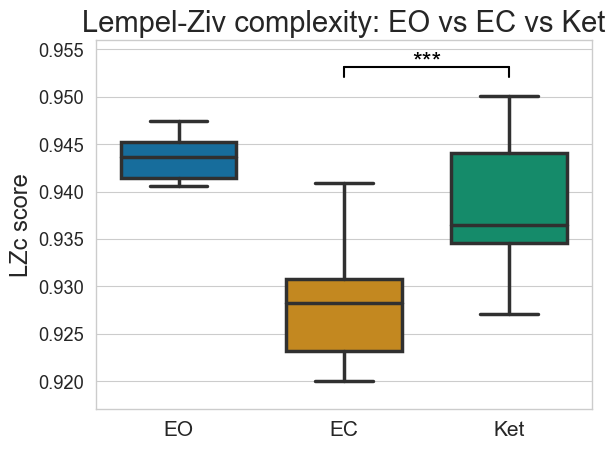

In [79]:
#Plot the LZC for each condition
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the dictionary to a short-form dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC.items() for x in v1], columns=['Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Condition', y='Value', data=df, palette="colorblind", width=0.7, order=["EO", "EC", "Ket"], showfliers=False)
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel(None)
plt.ylabel('LZc score', size=17)
plt.title('Lempel-Ziv complexity: EO vs EC vs Ket', size=21)

#Create loop of checking all possible combinations and calculating the t-test
g = ['EO','EC','Ket']
ys = list()
for i in range(0,len(g)-1):
    for j in range(i+1,len(g)):
        group1, group2 = LZC[g[i]], LZC[g[j]]
        t, p = ttest_ind(group1, group2)
        # add significance lines if p-value is significant
        if p < 0.05:
            # calculate y position for the line
            y = np.max([max(group1), max(group2)]) + 0.003
            if y in ys:
                y += 0.015
            else:
                ys.append(y)
            # add line with asterisks indicating significance level
            plt.plot([i, j], [y, y], lw=1.5, c='k')
            plt.plot([i,i], [y, y - 0.001], lw=1.5, c='k')
            plt.plot([j,j], [y, y - 0.001], lw=1.5, c='k')
            plt.text(i+(j-i)/2, y + 0.0005, "***", ha='center', va='center', color='k', fontsize=18)
# Save the plot to a file
plt.ylim(0.917,0.956)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ket_comparison_boxplot_fixed_sig.png',dpi=300)
plt.show()

In [ ]:
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()

C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\3875361487.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [df['EC'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)


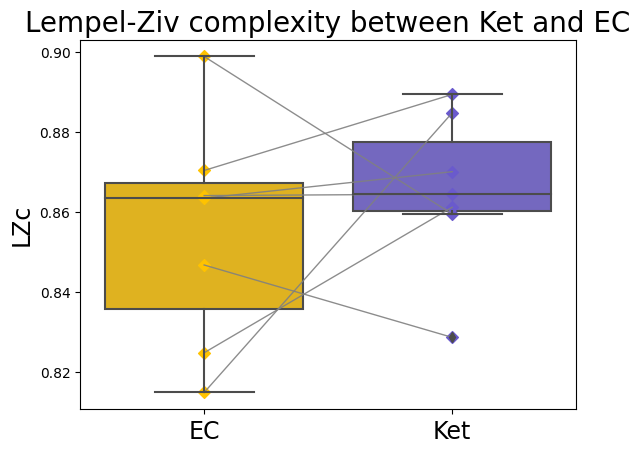

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Connect the points between Ket and EC with lines
plt.scatter([1]*len(df['Ket']), df['Ket'], label='Ket', color="#6A5ACD", marker="D")
plt.scatter([0]*len(df['EC']), df['EC'], label='EC', color="#FFC300", marker="D")
plt.plot([0, 1], [df['EC'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)
plt.xticks([0, 1], ['EC', 'Ket'], size=17)
plt.ylabel('LZc', size=17)
plt.title('Lempel-Ziv complexity between Ket and EC', size=20)

# Create a boxplot for the Ket and EC groups
df=df.reindex(columns=['EC', 'Ket'])
sns.boxplot(data=df, palette=["#FFC300", "#6A5ACD"])

# create two subgroups
group1 = LZC['EC']
group2 = LZC['Ket']

# perform t-test
t, p = ttest_ind(group1, group2)

# add significance lines if p-value is significant
if p < 0.05:
    # calculate y position for the line
    y = np.max([max(group1), max(group2)]) + 0.021
    # add line with asterisks indicating significance level
    plt.ylim(0.80,0.93)
    plt.plot([0, 1], [y, y], lw=1.5, c='k')
    plt.plot([0,0], [y, y - 0.004], lw=1.5, c='k')
    plt.plot([1,1], [y, y - 0.004], lw=1.5, c='k')
    plt.text(0.5, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)


plt.xlabel(None)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ket_comparison_boxplot_subjects_dotpoints.png',dpi=300)
plt.show()

In [33]:
#The same as above, just in general LZc between ket and non-ket
import pyconscious as pyc
from statistics import mean

#Loop through the data and calculate LZC
def calculate_lz(array):
    # Calculate the Lempel-Ziv complexity using pyconscious
    return pyc.LZc(array,ea="raw")

LZC3 = {'Ket':[],'Non-ket':[]}
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1':
            if pers != '2001':
                LZC3['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers]),pyc.LZc(DataA['SED_4'][pers])]))
            else:
                LZC3['Ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['SED_2'][pers]),pyc.LZc(DataA['SED_3'][pers])]))
        elif cond == 'EC':
            if pers != 'SD5008':
                LZC3['Non-ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['EO'][pers]),pyc.LZc(DataA['EMERGENCE'][pers])]))
            else:
                LZC3['Non-ket'].append(mean([pyc.LZc(DataA[cond][pers]),pyc.LZc(DataA['EO'][pers])]))

In [34]:
# Convert the dictionary to a short-form dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC3.items() for x in v1], columns=['Condition', 'Value'])
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()

C:\Users\andrlm\AppData\Local\Temp\ipykernel_16336\2214799153.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [df['Non-ket'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)


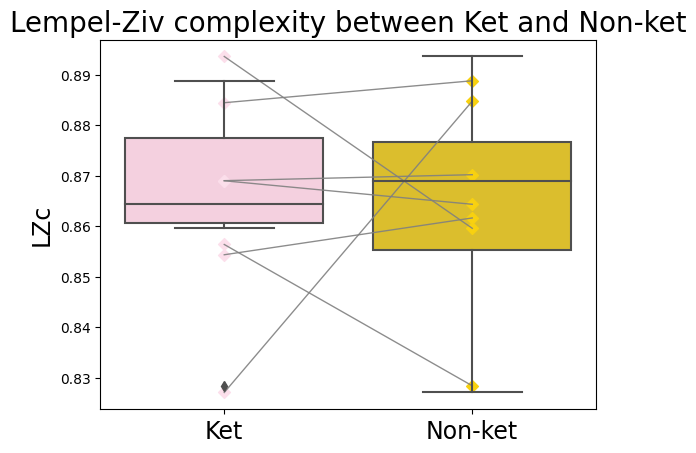

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Connect the points between Ket and EC with lines
plt.scatter([1]*len(df['Ket']), df['Ket'], label='Ket', color="#f8d110", marker="D")
plt.scatter([0]*len(df['Non-ket']), df['Non-ket'], label='No-ket', color="#fcdfeb", marker="D")
plt.plot([0, 1], [df['Non-ket'], df['Ket']], 'k-',alpha=0.9, color="grey", lw=0.99)
plt.xticks([0, 1], ['Non-ket', 'Ket'], size=17)
plt.ylabel('LZc', size=17)
plt.title('Lempel-Ziv complexity between Ket and Non-ket', size=20)

# Create a boxplot for the Ket and EC groups
sns.boxplot(data=df, palette=["#FACADE", "#f8d110"])

# create two subgroups
group1 = LZC['Non-ket']
group2 = LZC['Ket']

# perform t-test
t, p = ttest_ind(group1, group2)

# add significance lines if p-value is significant
if p < 0.05:
    # calculate y position for the line
    y = np.max([max(group1), max(group2)]) + 0.021
    # add line with asterisks indicating significance level
    plt.ylim(0.80,0.93)
    plt.plot([0, 1], [y, y], lw=1.5, c='k')
    plt.plot([0,0], [y, y - 0.004], lw=1.5, c='k')
    plt.plot([1,1], [y, y - 0.004], lw=1.5, c='k')
    plt.text(0.5, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)


plt.xlabel(None)
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ket_comparison_boxplot_subjects_dotpoints_ket_no_ket.png',dpi=300)
plt.show()

In [55]:
import pickle
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [56]:
#### Calculate LZc for all data and categorize into ED and non-ED ####

#Calculate Lempel-Ziv complexity to compare between ket and non-ket
import pyconscious as pyc
import pandas as pd

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]

LZC2 = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]

#Change 2001 label '2001'
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
# Rename column 'B' to 'B_new' and change its data type to string
df = df.rename(columns={2001: '2001'})

#Categorize into ED and non-ED
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond in ket_conds:
            if pers == '2001':
                pers = 'Pilot_2001'
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if pers == 'Pilot_2001':
                pers = '2001'
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    LZC2['ED_ON: 0'].append(pyc.LZc(DataA[cond][pers]))
                elif ED_sum == 1 and ON_sum == 1:
                    LZC2['ED_ON: 1'].append(pyc.LZc(DataA[cond][pers]))
                else:
                    LZC2['ED_ON: 1 & 0'].append(pyc.LZc(DataA[cond][pers]))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                LZC2['ED: 1'].append(pyc.LZc(DataA[cond][pers]))
        else: 
            LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))



In [57]:
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(LZC2, orient='index')

# Transpose the DataFrame
df = df.transpose()

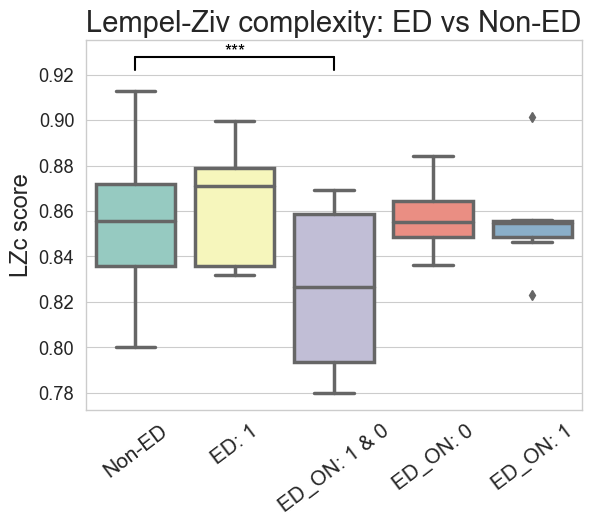

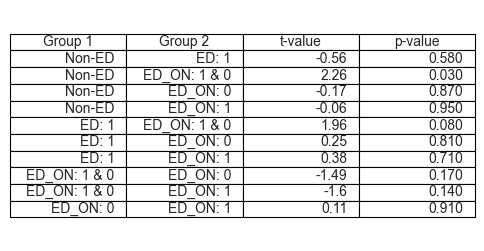

In [58]:
#Plot the LZC for each condition
from scipy.stats import ttest_ind
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

#Convert dictionary to pandas dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC2.items() for x in v1], columns=['Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Condition', y='Value', data=df, palette='Set3')
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=15, rotation=37)
plt.xlabel(None)
plt.ylabel('LZc score', size=17)
plt.title('Lempel-Ziv complexity: ED vs Non-ED', size=21)

#Create loop of checking all possible combinations and calculating the t-test
ys = list()
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()
# Create an empty dataframe to store the results
results = pd.DataFrame(columns=['Group 1', 'Group 2', 't-value', 'p-value'])
#Create loop of checking all possible combinations and calculating the t-test
g = ['Non-ED', 'ED: 1', 'ED_ON: 1 & 0', 'ED_ON: 0', 'ED_ON: 1']
for i in range(0,len(g)-1):
    for j in range(i+1,len(g)):
        group1, group2 = list(df[g[i]]), list(df[g[j]])
        group1 = [x for x in group1 if not math.isnan(x)]
        group2 = [x for x in group2 if not math.isnan(x)]
        t, p = ttest_ind(group1, group2)
        results.loc[len(results)] = [g[i], g[j], round(t,2), round(p,2)]
        # add significance lines if p-value is significant
        if p < 0.05:
            # calculate y position for the line
            y = np.max([max(group1), max(group2)]) + 0.015
            if y in ys:
                y += 0.017
            else:
                ys.append(y)
            # add line with asterisks indicating significance level
            plt.plot([i, j], [y, y], lw=1.5, c='k')
            plt.plot([i,i], [y, y - 0.006], lw=1.5, c='k')
            plt.plot([j,j], [y, y - 0.006], lw=1.5, c='k')
            plt.text(i+(j-i)/2, y + 0.002, "***", ha='center', va='center', color='k', fontsize=13)
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ED_comparison_boxplot_sig_extended.png',dpi=300)

plt.show()

# Format the p-values as strings with three decimal places
results['p-value'] = results['p-value'].apply(lambda x: '{:.3f}'.format(x))

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
ax.axis('tight')

# Add the table to the plot
table = ax.table(cellText=results.values, colLabels=results.columns, loc='center')

# Set the font size of the table
table.set_fontsize(14)

# Save the plot as a PNG file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\table.png', dpi=300, bbox_inches='tight')


Condition     ED: 1  ED_ON: 0  ED_ON: 1  ED_ON: 1 & 0    Non-ED
0          0.846216  0.866931  0.885721      0.829053  0.917506
1          0.843888  0.856629  0.840426      0.805482  0.895542
2          0.876414  0.889131  0.856686      0.876458  0.842397
3          0.878098  0.842123  0.854886      0.851024  0.880775
4          0.863988       NaN  0.912277      0.806011  0.844496


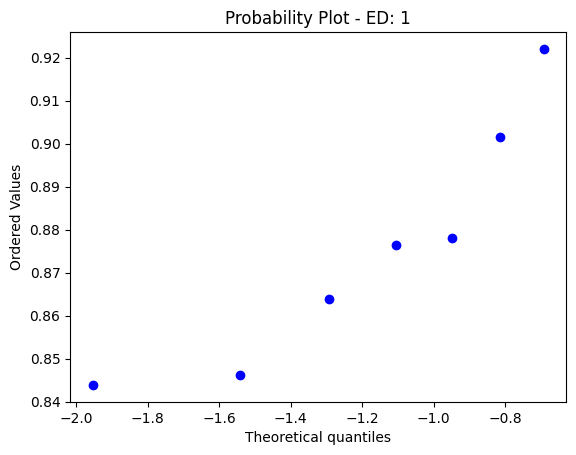

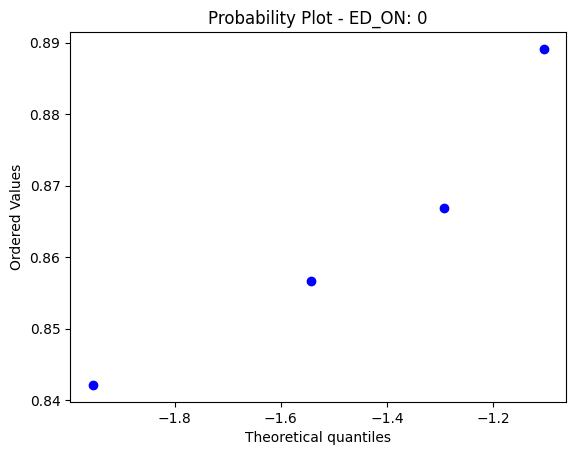

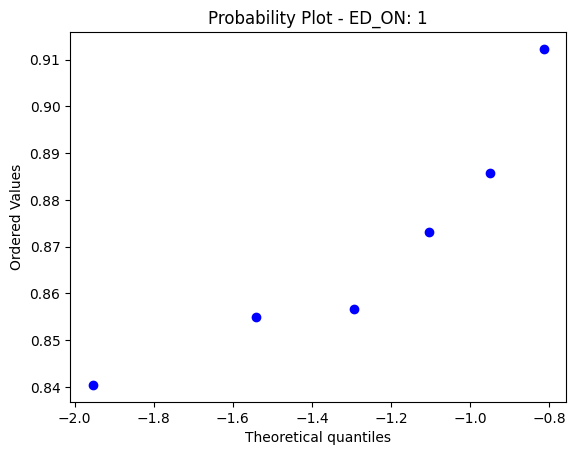

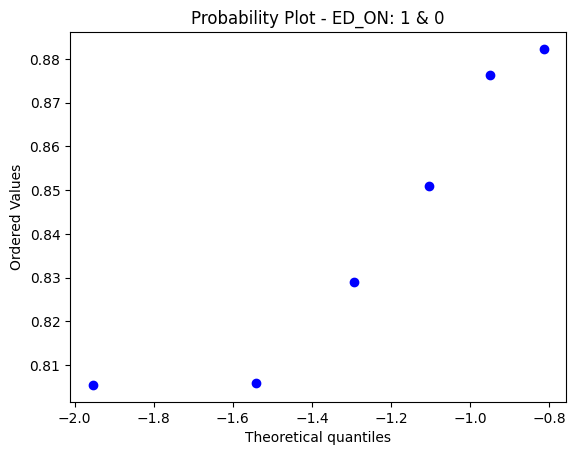

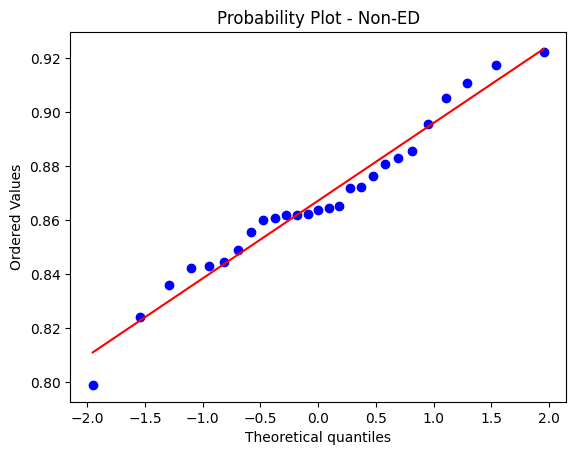

In [18]:
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt

#Test for normality
for major in df:
    stats.probplot(df[major], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [40]:
#### Calculate LZc for all data and categorize into ED and non-ED ####

#Calculate Lempel-Ziv complexity to compare between ket and non-ket
import pyconscious as pyc
import pandas as pd

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]

LZC2 = {'ED: 1':[], 'ED: 0':[]}
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]

#Change 2001 label '2001'
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
# Rename column 'B' to 'B_new' and change its data type to string
df = df.rename(columns={2001: '2001'})

#Categorize into ED and non-ED
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            if pers == '2001':
                pers = 'Pilot_2001'
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            if pers == 'Pilot_2001':
                pers = '2001'
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 1:
                    LZC2['ED: 1'].append(pyc.LZc(DataA[cond][pers]))
                elif ED_sum == 0:
                    LZC2['ED: 0'].append(pyc.LZc(DataA[cond][pers]))

In [41]:
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(LZC2, orient='index')

# Transpose the DataFrame
df = df.transpose()


t-value: 0.5484271075999232,p:value: 0.5891821516636071


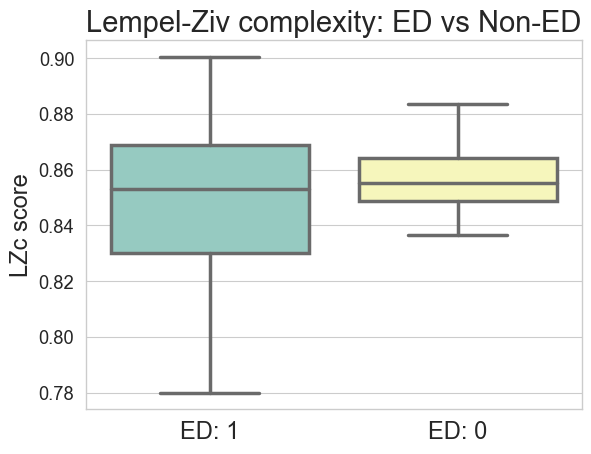

In [47]:
#Plot the LZC for each condition
from scipy.stats import ttest_ind
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

#Convert dictionary to pandas dataframe
df = pd.DataFrame([(k1, x) for k1,v1 in LZC2.items() for x in v1], columns=['Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Condition', y='Value', data=df, palette='Set3')
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=17)
plt.xlabel(None)
plt.ylabel('LZc score', size=17)
plt.title('Lempel-Ziv complexity: ED vs Non-ED', size=21)

#Create loop of checking all possible combinations and calculating the t-test
ys = list()
#Convert df long dataframe to wide dataframe
df = df.set_index([df.groupby('Condition').cumcount(), 'Condition'])['Value'].unstack()
group1, group2 = df['ED: 0'], df['ED: 1']
group1 = [x for x in group1 if not math.isnan(x)]
t, p = ttest_ind(group1, group2)
print(f"t-value: {t},p:value: {p}")
# add significance lines if p-value is significant
if p < 0.05:
    # calculate y position for the line
    y = np.max([max(group1), max(group2)]) + 0.015
    if y in ys:
        y += 0.015
    else:
        ys.append(y)
    # add line with asterisks indicating significance level
    plt.plot([i, j], [y, y], lw=1.5, c='k')
    plt.plot([i,i], [y, y - 0.006], lw=1.5, c='k')
    plt.plot([j,j], [y, y - 0.006], lw=1.5, c='k')
    plt.text(i+(j-i)/2, y + 0.002, "***", ha='center', va='center', color='k', fontsize=18)
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\lz_ED_comparison_boxplot_fixed_sig.png',dpi=300)

plt.show()

In [46]:
print(df['ED: 0'])

0     0.852907
1     0.857854
2     0.883567
3     0.836467
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
Name: ED: 0, dtype: float64


In [ ]:
# Develop a binary classification algorithm to predict ED status based on EEG data

#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Create a dataframe with all the data

import pandas as pd

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]

LZC2 = {'Non-ED':[], 'ED':[]}
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]

#Change 2001 label '2001'
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
# Rename column 'B' to 'B_new' and change its data type to string
df = df.rename(columns={2001: '2001'})

#Categorize into ED and non-ED
for cond in DataA.keys():
    for pers in DataA[cond]:
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            if pers == '2001':
                pers = 'Pilot_2001'
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            print(ED_sum)
            if pers == 'Pilot_2001':
                pers = '2001'
            if ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))
                elif ED_sum == 1:
                    LZC2['ED'].append(pyc.LZc(DataA[cond][pers]))
        else: 
            LZC2['Non-ED'].append(pyc.LZc(DataA[cond][pers]))
#Reduce the number of dimensions using PCA

#Split the data into training and test sets

#Scale the data

#Train the model

#Make predictions and evaluate performance

#Plot the ROC curve

#Plot the confusion matrix

#Plot the classification report

In [1]:
import pickle
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [2]:
#Shorten all epochs to the last minute of recording
for cond in DataA.keys():
    for pers in DataA[cond].keys():
        DataA[cond][pers] = DataA[cond][pers][-7:-1]
        print(pers,cond)
        print(DataA[cond][pers].shape)

2001 EO
(6, 63, 351)
SD5001 EO
(6, 63, 351)
SD5002 EO
(6, 63, 351)
SD5007 EO
(6, 63, 351)
SD5008 EO
(6, 63, 351)
SD5009 EO
(6, 63, 351)
SD5010 EO
(6, 63, 351)
2001 EC
(6, 63, 351)
SD5001 EC
(6, 63, 351)
SD5002 EC
(6, 63, 351)
SD5007 EC
(6, 63, 351)
SD5008 EC
(6, 63, 351)
SD5009 EC
(6, 63, 351)
SD5010 EC
(6, 63, 351)
2001 INDUCTION
(6, 63, 351)
SD5001 INDUCTION
(6, 63, 351)
SD5002 INDUCTION
(6, 63, 351)
SD5007 INDUCTION
(6, 63, 351)
SD5008 INDUCTION
(6, 63, 351)
SD5009 INDUCTION
(6, 63, 351)
SD5010 INDUCTION
(6, 63, 351)
2001 SED_1
(6, 63, 351)
SD5001 SED_1
(6, 63, 351)
SD5002 SED_1
(6, 63, 351)
SD5007 SED_1
(6, 63, 351)
SD5008 SED_1
(6, 63, 351)
SD5009 SED_1
(6, 63, 351)
SD5010 SED_1
(6, 63, 351)
2001 SED_2
(6, 63, 351)
SD5001 SED_2
(6, 63, 351)
SD5002 SED_2
(6, 63, 351)
SD5007 SED_2
(6, 63, 351)
SD5008 SED_2
(6, 63, 351)
SD5009 SED_2
(6, 63, 351)
SD5010 SED_2
(6, 63, 351)
2001 SED_3
(6, 63, 351)
SD5001 SED_3
(6, 63, 351)
SD5002 SED_3
(6, 63, 351)
SD5007 SED_3
(6, 63, 351)
SD5008 SED_3

In [8]:
import pandas as pd
import numpy as np
#Reduce each pers and cond to a single value
LZC2 = {'value':[], 'label:':[]}
Q_corresp = [91,98,105,112]

df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")

for cond in DataA.keys():
    for pers in DataA[cond].keys():
        LZC2['value'].append(np.mean(np.mean(np.mean(DataA[cond][pers],axis=0),axis=0),axis=0))
        if pers == '2001':
            pers = 'Pilot_2001'
        ED_sum = df.loc[Q_corresp[cond],pers]
        if pers == 'Pilot_2001':
            pers = '2001'
        if ED_sum == ED_sum:
            if type(ED_sum) == str:
                ED_sum = int(round(float(ED_sum)))
            else:
                ED_sum = int(ED_sum)
            LZC2['label'].append(ED_sum)
        else:
            LZC2['label'].append(0)


TypeError: list indices must be integers or slices, not str

In [6]:
d = {'d':[]}
d['d'].append(1)
print(d['d'])

[1]
